<a href="https://colab.research.google.com/github/dakotarawlings/tool_image_classification/blob/main/ImageScrapingBingAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This notebook calls the bing image search API for a list of search terms and 
#Saves the images in specified directories in google drive

import requests
import os
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import numpy as np
import time

#Get a subscription key for the bing search API via the Azure portal
#Create variables for the key and the API endpoint
subscription_key = "b640c7aa9b184ed58bb66aeeef89c1d4"
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
search_term = "wrench"



In [ ]:
#Establish a conection with google drive so that we can store files in drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#specify directories for image data
root_path="/content/gdrive/My Drive/Colab Notebooks/Tool_CV_project/"
data_path="/content/gdrive/My Drive/Colab Notebooks/Tool_CV_project/tool_dataset/"

directories=['drill','hammer', 'screw_driver', 'pliers','allen_key', 'circular_saw', 'hand_saw', 'hacksaw', 'wrench', 'lug_wrench']



In [ ]:
#Create directories for each image category
for directory in directories:
  path=os.path.join(data_path, directory)
  if not os.path.exists(path):
    os.makedirs(path)


In [ ]:
#Create list of search terms to send API for each category
search_terms=['power drill','claw hammer','screw driver', 'pliers','allen key','circular saw', 'hand saw', 'hacksaw', 'open wrench', '4 way lug wrench']


In [ ]:
#Define the header for the API requests with the subscription key
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

In [ ]:
#first we doa  test search to make sure everything works
#Define the parameters for the search
params  = {"q": search_term, "license": "public", "imageType": "photo"}


In [ ]:
#Make the HTTTP request to the bing api
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()

#Extract a list of URLS for image thumbnails from the response
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][16:32]]

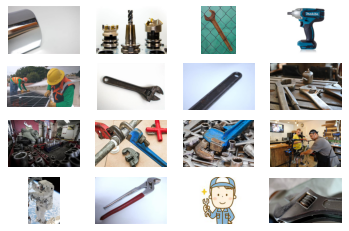

In [ ]:
#Request image files and display a sample of the returned images
f, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

In [ ]:
#Now we write a loop to scrape ~500 images for each category
#The max number of image urls for each api request is 150 so we make requests in sets of 150

max_results=600
group_size=150

#loopthrough each search term
for search_term in search_terms:

  #get the total number of results from API response to make sure we dont go over this
  total_results=min(search_results['totalEstimatedMatches'],max_results)

  #make requests in sets of 150 since the API only returns 150 at a time
  for offset in range(0,total_results,group_size):
    
    #Define parameters for API call
    params  = {"q": search_term, "license": "public", "imageType": "photo", "count":group_size, "offset":offset}

    #Make the HTTTP request to the bing api

    time.sleep(np.random.randint(30,60))
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()

    #Extract a list of image thumbnail URLs from the response
    thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"]]

    #Loop through each link in list of URLS, request image, and save it to file
    for i in range(len(thumbnail_urls)):

      #Make request for image file
      #image_data = requests.get(thumbnail_urls[i])
      #image_data.raise_for_status()
      #image = Image.open(BytesIO(image_data.content))

      #save the file to our directory with our dataset
      with open(data_path+directories[search_terms.index(search_term)]+'/'+str(offset+i)+".jpg","wb") as f:
        try:
          image_data=requests.get(thumbnail_urls[i], timeout=30)
          image_data.raise_for_status()
          f.write(image_data.content)
        except:
          print("Error on: "+str(search_term)+str(offset+i))





Error on: pliers392
